In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/My Drive/food

/content/gdrive/My Drive/food


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        shear_range=0.3,
        horizontal_flip=True,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.25,
)
valid_datagen = ImageDataGenerator(
        rescale=1./255,
)

In [ ]:
batch_size = 64
img_width = 128
img_height = 128

train_data = train_datagen.flow_from_directory(
    './train/',
    batch_size=batch_size,
    target_size=(img_width, img_height),
    shuffle=True,
)
valid_data = valid_datagen.flow_from_directory(
    './Validation/',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=False,
)

Found 298 images belonging to 3 classes.
Found 96 images belonging to 3 classes.


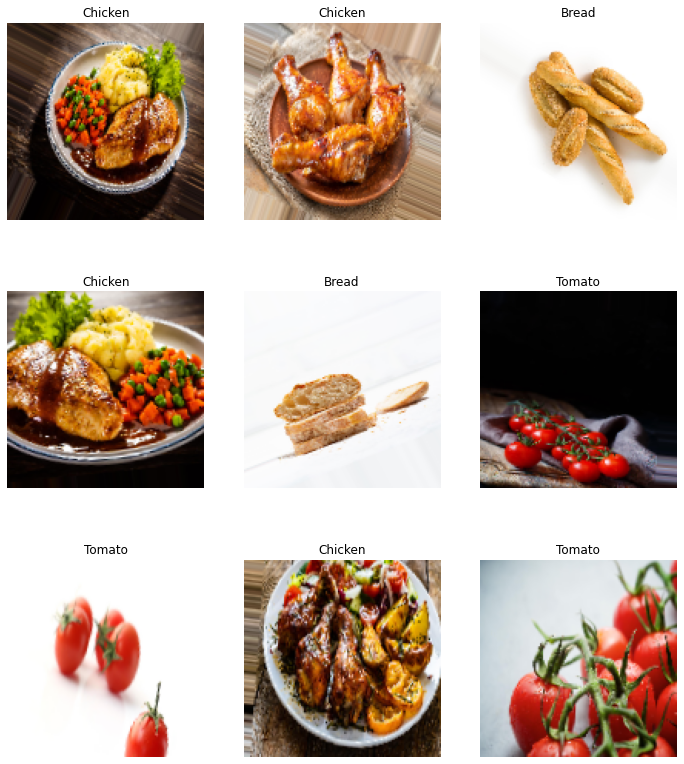

In [ ]:
def visualize_images(images, labels):
    figure, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 14))
    classes = list(train_data.class_indices.keys())
    img_no = 0
    for i in range(3):
        for j in range(3):
            img = images[img_no]
            label_no = np.argmax(labels[img_no])

            ax[i,j].imshow(img)
            ax[i,j].set_title(classes[label_no])
            ax[i,j].set_axis_off()
            img_no += 1

images, labels = next(train_data)
visualize_images(images, labels)

In [ ]:
base = MobileNetV2(input_shape=(img_width, img_height,3),include_top=False,weights='imagenet')
base.trainable = True
model = Sequential()
model.add(base)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss = 'categorical_crossentropy',metrics=['accuracy'])

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',patience = 1,verbose = 1)
early_stop = EarlyStopping(monitor = 'val_accuracy',patience = 5,verbose = 1,restore_best_weights = True)
check_point = ModelCheckpoint('best_model_.h5',monitor='val_accuracy',verbose=1,save_best_only=True)

In [ ]:
history = model.fit(train_data, epochs=50, validation_data = valid_data, callbacks=[early_stop,reduce_lr,check_point])

Epoch 1/50
5/5 [==============================] - 176s 33s/step - loss: 0.5356 - accuracy: 0.7685 - val_loss: 0.0550 - val_accuracy: 0.9896

Epoch 00001: val_accuracy improved from -inf to 0.98958, saving model to best_model.h5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/50
5/5 [==============================] - 25s 5s/step - loss: 0.0757 - accuracy: 0.9732 - val_loss: 0.0490 - val_accuracy: 0.9792

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00002: val_accuracy did not improve from 0.98958
Epoch 3/50
5/5 [==============================] - 24s 5s/step - loss: 0.0634 - accuracy: 0.9732 - val_loss: 0.0603 - val_accuracy: 0.9688

Epoch 00003: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00003: val_accuracy did not improve from 0.98958
Epoch 4/50
5/5 [==============================] - 24s 5s/step - loss: 0.0268 - accuracy: 0.9899 - val_loss: 0.0584 - val_accuracy: 0.9792

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 00004: val_accuracy did not improve from 0.98958
Epoch 5/50
5/5 [==============================] - 24s 5s/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.0560 - val_accuracy: 0.9792

Epoch 00005: ReduceLROnPlateau re

In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  model.save('./resnet50_food_model')

In [ ]:
model = tf.keras.models.load_model('/content/gdrive/MyDrive/food/best_model_.h5')

New image prediction :  Chichen
accuracy : 0.9168072938919067


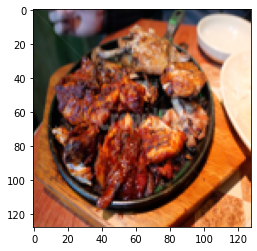

New image prediction :  Bread
accuracy : 0.9975340366363525


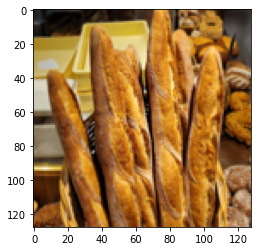

New image prediction :  Chichen
accuracy : 0.7042081952095032


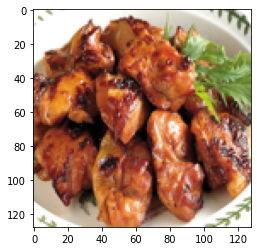

New image prediction :  Tomato
accuracy : 0.9999997615814209


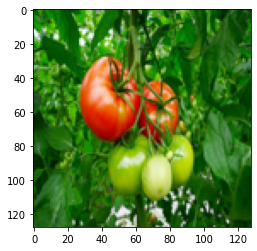

New image prediction :  Tomato
accuracy : 1.0


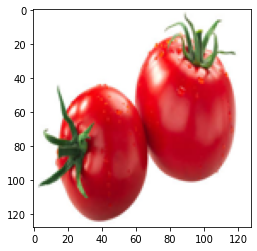

New image prediction :  Tomato
accuracy : 0.6453533172607422


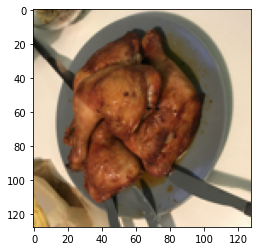

New image prediction :  Chichen
accuracy : 0.8215677738189697


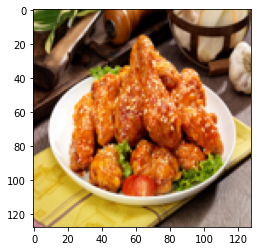

In [ ]:
# test 폴더에 있는 이미지를 이용해서 인식 / 분류 실행 
import numpy as np
import matplotlib.image as mpimg
from PIL import Image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline

targetx = 128
targety = 128

test_dir = os.getcwd()+"/test/"

image_path = []
for i in os.listdir(test_dir):
    test_image_name = test_dir + i
    image_path.append(test_image_name)  

for image in image_path:
    img = Image.open(image)
    img = img.convert("RGB")
    img = img.resize((targetx,targety))    
    data = np.asarray(img)
    X = np.array(data)
    X = X.astype("float") / 256
    X = X.reshape(-1, targetx, targety,3)
    categories = ["Bread","Chichen","Tomato"]
    pred = model.predict(X)  
    result = [np.argmax(value) for value in pred]   # 예측 값중 가장 높은 클래스 반환
    print('New image prediction : ',categories[result[0]])
    print("accuracy : {}".format(max(pred[0][0],pred[0][1],pred[0][2])))
    plt.imshow(img)
    plt.show()

In [ ]:
                                                                                                                                                                                                                                                                                                                                                       test_dir = os.getcwd()+"/test/"